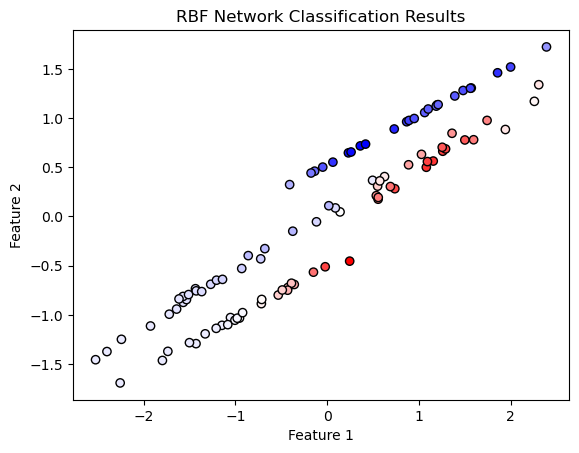

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class RBFNetwork:
    def __init__(self, n_centers, sigma=1.0):
        self.n_centers = n_centers
        self.sigma = sigma
        
    def _rbf(self, X, centers):
        """
        Radial Basis Function (Gaussian Kernel) activation
        X: Input data (N x D)
        centers: RBF centers (M x D)
        """
        # Calculate the squared Euclidean distance between X and each center
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        return np.exp(-distances**2 / (2 * self.sigma**2))

    def fit(self, X, y):
        """
        Train the RBF Network.
        X: Input data (N x D)
        y: Output labels (N x 1)
        """
        # Step 1: Initialize RBF centers (randomly select n_centers from X)
        indices = np.random.choice(X.shape[0], self.n_centers, replace=False)
        self.centers = X[indices]

        # Step 2: Compute RBF activations for each center
        activations = self._rbf(X, self.centers)

        # Step 3: Solve for the output weights using Least Squares (W = (A.T * A)^(-1) * A.T * y)
        self.weights = np.linalg.pinv(activations).dot(y)

    def predict(self, X):
        """
        Predict using the trained RBF Network
        X: Input data (N x D)
        """
        activations = self._rbf(X, self.centers)
        return activations.dot(self.weights)

# Generate a simple dataset for classification
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2, random_state=42)

# Convert labels to -1, 1 for simplicity in the RBF network
y = 2 * y - 1

# Create and train the RBF Network
rbf_net = RBFNetwork(n_centers=5, sigma=1.0)
rbf_net.fit(X, y)

# Predict on the dataset
predictions = rbf_net.predict(X)

# Visualize the results (we will plot only the first 2 features for visualization)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='o', edgecolors='k')
plt.title("RBF Network Classification Results")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
